# Análise exploratória de dados

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

## 1. Descrição dos dados

In [ ]:
Os dados do Titanic são para o levantamento de quais fatores influenciaram na sobrevivência dos passageiros. Será trabalhado a classe social, idade, sexo e se possuía passageiros a bordo. O objetivo é prever se um passageiro sobreviveu ou não ao acidente.

1.2 Entendimento de Dados

In [4]:
df = pd.read_csv('../data/raw/train.csv')
df_dict = pd.read_csv('../data/raw/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Dicionário de dados

In [3]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,Survival,"Sobrevivente 0 = No, 1 = Yes",qualitativa,nominal
1,Pclass,"Ticket Class 1 = 1st, 2 = 2nd, 3 = 3rd",qualitativa,ordinal
2,Sex,Gender,qualitativa,nominal
3,Age,Age in years,quantitativa,contínua
4,Sibsp,# of siblings / spouses aboard the Titanic,qualitativa,nominal
5,Parch,# of parents / children aboard the Titanic,qualitativa,nominal
6,Ticket,Ticket Number,qualitativa,nominal
7,Fare,Passenger fare,quantitiva,discreta
8,Cabin,Cabin Number,qualitativa,ordinal
9,Embarked,Port of Embarkation,qualitativa,nominal


2.1 Variáveis

In [4]:
quantitativas_discretas = dicionario[(dicionario['tipo'] == 'quantitativa') & (dicionario['subtipo'] == 'discreta')].shape[0]
quantitativas_continuas = dicionario[(dicionario['tipo'] == 'quantitativa') & (dicionario['subtipo'] == 'contínua')].shape[0]
qualitativas_nominais = dicionario[(dicionario['tipo'] == 'qualitativa') & (dicionario['subtipo'] == 'nominal')].shape[0]
qualitativas_ordinais = dicionario[(dicionario['tipo'] == 'qualitativa') & (dicionario['subtipo'] == 'ordinal')].shape[0]

quantidade_qualitativa = qualitativas_nominais + qualitativas_ordinais
quantidade_quantitativa = quantitativas_continuas + quantitativas_discretas

display(Markdown(f"""
---
 - São {dicionario.shape[0]} variáveis: {quantidade_qualitativa} qualitativas e {quantidade_quantitativa} quantitativas e 1 variável inútil;
    - Qualitativas: {qualitativas_nominais} nominais e {qualitativas_ordinais} ordinais;
    - Quantitativas: {quantitativas_continuas} contínuas e {quantitativas_discretas} discretas;
---
"""))


---
 - São 10 variáveis: 8 qualitativas e 1 quantitativas e 1 variável inútil;
    - Qualitativas: 6 nominais e 2 ordinais;
    - Quantitativas: 1 contínuas e 0 discretas;
---


## 2. Perguntas de partida e hipóteses

In [ ]:
Quais classes tiveram mais sobreviventes?
Qual é a média de idade dos passageiros que sobreviveram e dos que não sobreviveram ao naufrágio do Titanic?
Qual o percentual de sobreviventes por sexo?

Quais classes tiveram mais sobreviventes?

C:\Users\myle_\AppData\Local\Temp\ipykernel_11804\1176996870.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survivors_by_class.index, y=survivors_by_class.values, palette='viridis')


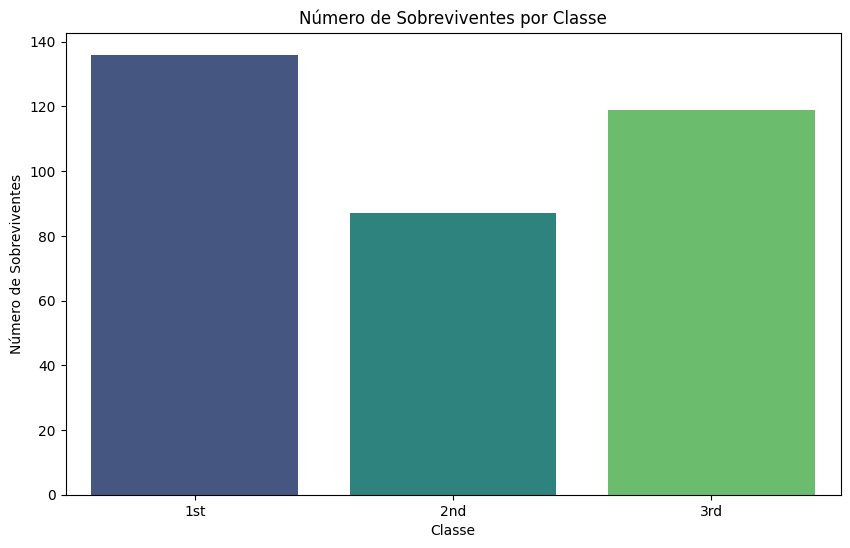

In [7]:
# Carregar o dataset do Titanic
titanic_df = pd.read_csv('../data/raw/train.csv')

# Contar o número de sobreviventes por classe
survivors_by_class = titanic_df[titanic_df['Survived'] == 1]['Pclass'].value_counts().sort_index()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=survivors_by_class.index, y=survivors_by_class.values, palette='viridis')
plt.title('Número de Sobreviventes por Classe')
plt.xlabel('Classe')
plt.ylabel('Número de Sobreviventes')
plt.xticks([0, 1, 2], ['1st', '2nd', '3rd'])
plt.show()

A partir do gráfico podemos concluir que:
Os passageiros da primeira classe tiveram mais sobreviventes

Qual é a média de idade dos passageiros que sobreviveram e dos que não sobreviveram ao naufrágio do Titanic?

In [ ]:
Qual é a média de idade dos passageiros que sobreviveram e dos que não sobreviveram ao naufrágio do Titanic?

C:\Users\myle_\AppData\Local\Temp\ipykernel_7372\4062998140.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Survived', y='Mean Age', data=mean_age_survived, palette='viridis')


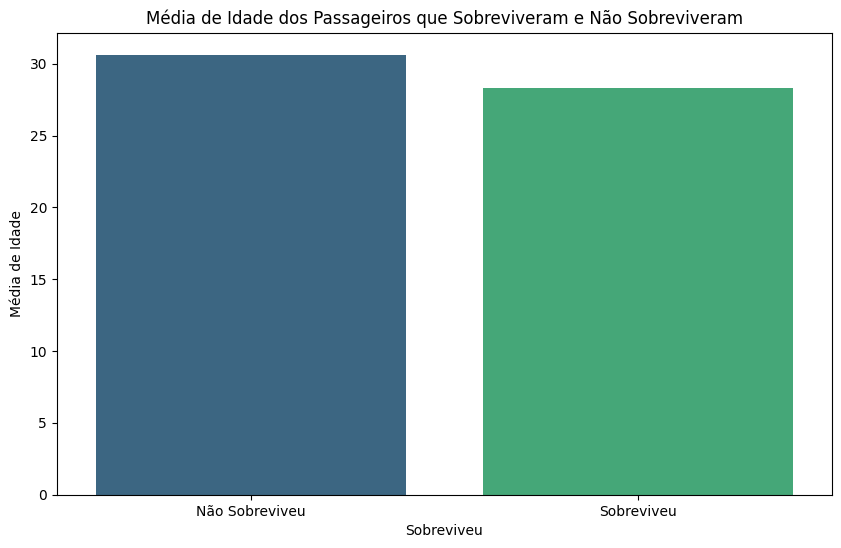

In [5]:
# Calcular a média de idade dos passageiros que sobreviveram e dos que não sobreviveram
mean_age_survived = df.groupby('Survived')['Age'].mean().reset_index()
mean_age_survived.columns = ['Survived', 'Mean Age']

# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Survived', y='Mean Age', data=mean_age_survived, palette='viridis')
plt.title('Média de Idade dos Passageiros que Sobreviveram e Não Sobreviveram')
plt.xlabel('Sobreviveu')
plt.ylabel('Média de Idade')
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'])
plt.show()

Qual o percentual de sobreviventes por sexo?

C:\Users\myle_\AppData\Local\Temp\ipykernel_10200\2720761020.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survival Rate', data=survival_rate_df, palette='viridis')


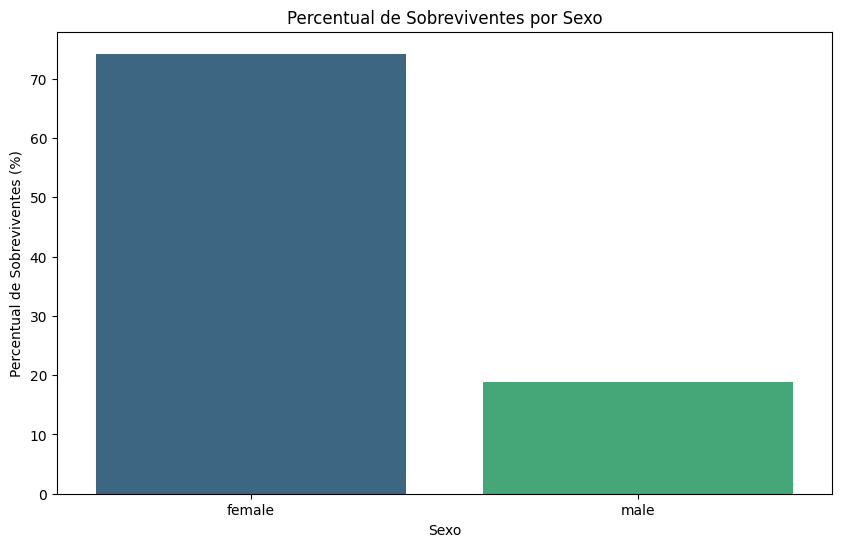

In [6]:
# Calcular o percentual de sobreviventes por sexo
survival_rate_by_sex = df.groupby('Sex')['Survived'].mean() * 100

# Criar um DataFrame com os resultados
survival_rate_df = survival_rate_by_sex.reset_index()
survival_rate_df.columns = ['Sex', 'Survival Rate']

# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survival Rate', data=survival_rate_df, palette='viridis')
plt.title('Percentual de Sobreviventes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Percentual de Sobreviventes (%)')
plt.show()

A partir do gráfico podemos concluir que:
Passageiros do sexo feminino tiveram mais chance de sobreviver

## 3. Insights

In [ ]:
## 3. Insights

A partir das análises realizadas, podemos obter os seguintes insights:

1. **Sobrevivência por Classe:**
    - Os passageiros da primeira classe tiveram mais sobreviventes em comparação com as outras classes.
    - Isso pode indicar que os passageiros da primeira classe tiveram mais acesso aos botes salva-vidas ou foram priorizados durante o resgate.

2. **Média de Idade dos Sobreviventes:**
    - A média de idade dos passageiros que sobreviveram é ligeiramente menor (28.34 anos) em comparação com aqueles que não sobreviveram (30.63 anos).
    - Isso pode sugerir que passageiros mais jovens tiveram uma chance ligeiramente maior de sobreviver ao naufrágio.

3. **Percentual de Sobreviventes por Sexo:**
    - Passageiros do sexo feminino tiveram uma chance significativamente maior de sobreviver em comparação com os passageiros do sexo masculino.
    - Isso pode ser explicado pela política de "mulheres e crianças primeiro" adotada durante o resgate.

Esses insights podem ajudar a entender melhor os fatores que influenciaram a sobrevivência dos passageiros do Titanic e podem ser utilizados para formular hipóteses adicionais ou direcionar análises futuras.